# Part 3: Making inferences

In the previous part, when we fitted models to the data, we (implicitly) assumed that the hidden parameters exists somewhere out there in the world and we tried to find them. 

To illustrate why this is important, suppose we are flipping a biased coin.

After 4 flips the coin landed heads 3 times and tails 1 time. Using maximum likelihood estimation, we would find that parameter p (probability of tails) is 0.25. Remember from last part: we just note the parameter and then do some Computer Science to find. 

But we are about to turn this view upside down using Bayes theorem. We will view the parameters themselves as random variables and then find the distribution for them. We will then talk about the probability - the confidence -  that the parameters are certain value. 

I mentioned confidence. Suppose we repeat the experiment decribed above, but this time we flip the coin 100 times out which 25 are tails. We would get the same maximum likelihood estimator for p - 0.25. But in this case we are more *confindent* that we are close to the right value and the result is not just a fluctuation in the matrix. We will learn how to quantify this confidence later on in this notebook.

Before we begin, let's prepare the environment with some useful imports:

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

## Expected Value

You need to get used to the idea that in this section we will not get a single nice value for parameters but rather a probability density for possible values. The issue now becomes - how do we report some meaningful numbers from our analysis? For this we have to go back to mathematicians and see what they have figured out.

A simple probability distribution statistics we can use is **Expected value**. It is an average of the random variable but it is weighted by the probability of any particular value. Formally, it is a sum over all possible values multiplied by their respective probabilities.  

$$E[X] = \Sigma^n_{i=1}p_i\times x_i =p_1x_1 + p_2x_2 ... + p_nx_n $$

Notice the notation: expected value is denoted $E$ and in square brackets we put the random variable we are interested in.

Example: Let $X$ be our random variable which is taken from $Poisson(\lambda = 4)$ distribution. What is $E[X]$? 

Firstly, we can look at the definition of this distribution to figure out the probability for a given value of $X$.
$$Pr_x(x) = \frac{\lambda^xe^{-\lambda}}{x!} = \frac{4^xe^{-4}}{x!}$$

Our sum in this case would be infinite because $X$ values can vary from 0 to infinity, but since we have factorial in the denominator, we know that large values for $X$ are very very unlikely, so the term corresponding to them will be almost zero. So to estimate $E[X]$ we will sum the first 15 values for $X$. 

In [ ]:
E_X = 0

for x in range(15):
  E_X += scipy.stats.poisson.pmf(x, 4)*x

E_X

3.9996946863386253

We get that the expected $X$ is very close to $4$ which is our $\lambda$. That is consistent with the mathematical results for this distribution.

Expected value represents the value that we are most likely to get *on average* if we draw a sample from the distribution.

Expected value might not even be a possible value. Consider random variable $M$. Let it be the amount of money you get in the following game: at the start you toss a fair coin, if the coin lands heads your friend pays you 1 dollar, if the coin lands tails you pay your friend 1 dollar. Simples!

So the possible values for $M$ after the game are $-1$ or $1$ and the probabilities of each:

$Pr_M(m=-1) = \frac{1}{2}$ and $Pr_M(m=1) = \frac{1}{2}$

So the expected value is $E[M] = \frac{1}{2}\times -1 + \frac{1}{2} \times 1 = 0$

So on average, you are neither better of nor worse of playing this game. That is, if you were to play it multiple times, you are likely to have the same amount of money as when you started.

What to do if the random variable is continous? This means there are infinite values it can take over some interval, so we cannot just use sums. What the mathematicians do in this case is integrate, but we will compute!

As I hinted to earlier, Expected value could be seen as the average result of multiple runs of the experiment. This makes sense intuitively: the more likely a particular value is, the more it will appear in our sample and so will draw the average towards itself! Furthermore, this suggest the computation method that we can use. Just draw a bunch of samples and average them!

$$E[X] \approx \frac{1}{n}\Sigma^n_{i=1}x_i$$

Let's pick a nifty continous distribution to see how it works. I will use $Beta(2,5)$ for this example. 

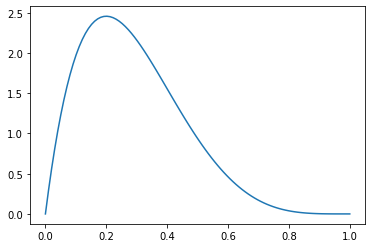

0.2864326267511913

In [ ]:
# Firstly let's plot the distribution to get a better feel for it
fig, ax = plt.subplots(1, 1)
a, b = 2, 5 # Parameters of the distribution
Beta = scipy.stats.beta.pdf
x = np.linspace(0, 1, 100)
ax.plot(x,Beta(x,a,b))
plt.show()

# Let's take a lot of samples from it:
samples = np.random.beta(a,b, size=10000) # returns a numpy array of size 100000 with the sampled values
expected = np.average(samples)
expected

That looks about right and hopefully you can see why expected value is a neat thing to calculate.

## Confidence interval

To express confidence we will use what is called a *confidence interval*. As the name suggests it has two parts - the interval and its confidence (i.e. a probability). A common way to write it is:

$$\mathbb{P}(Y \in [lo; hi]) = c$$

$lo$ and $hi$ are the bounds for the interval and $c$ is the confidence often expressed as a percentage. For instace, we could have:

$$\mathbb{P}(Y \in [3; 4]) = 95\%$$

This means that the probability that a sample drawn from $Y$ lies between $3$ and $4$ is $0.95$. Or we also say that $95$ percent confidence interval for $Y$ is $[3;4]$. 

How do we find such interval?
One thing we can notice, is that it is much easier to find probabilities of the form:
$$\mathbb{P}(Y \leq k) = p$$

So if we could find $k$ and $l$ such that:

$\mathbb{P}(Y \leq k) = 2.5\%$ and $\mathbb{P}(Y \leq l) = 97.5\%$ (i.e. $\mathbb{P}(Y > l) = 2.5\%$)

we would know that everything that lies in between $k$ and $l$ has the probability of $95\%$.

Technically, other bounds would work as well (for instance $2\%$ and $97\%$), but humans like to be symetric. 

At this point mathematicians would once again whip out their integrals (they are a really powerful tool. Even though they are out of scope of this course, make sure to learn it when you can!) but we can reason in terms of computation.

How to calculate $\mathbb{P}(Y \leq k)$? Say, we have a lot of samples - 100 looks like a good number - from our distribution of $Y$. And from those samples, only 10 are less than 3.2. What is your best estimate for $\mathbb{P}(Y \leq 3.2)$? 

From basic probability definition, it is the number of outcomes that satisfy your condition over all outcomes. In our case, our best estimate must be:  $\mathbb{P}(Y \leq 3.2) \approx \frac{10}{100} = 10\%$. By this reasoning, we can see that it is enough to count $Y$ samples in order and once the probability ticks up above $2.5\%$ (or other value of interest) stop. More formally,

$$\mathbb{P}(X \leq k) \approx \Sigma^n_{i=0}1_{x_i \leq k}$$

Let's illustrate this by finding a $95\%$ confidence interval for previous distribution - $Beta(2,5)$ 

95% confidence interval : [ 0.043032680067922255 ; 0.6405722811575383 ]


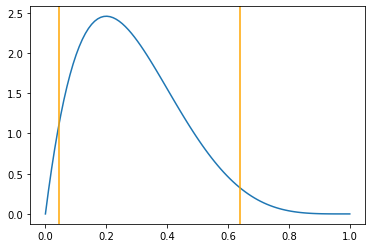

In [ ]:
# We will use samples we drawn before, first step is to sort them
smp_sorted = np.sort(samples)

# Find P(Y <= lo) = 2.5%
lo = smp_sorted[0]
n = 1
m = len(smp_sorted)

while True: #repeat until I say to stop
  # is current probability enough?
  if n/m >= 0.025:
    break #stop!
  # otherwise add another sample and increase the bound
  n+=1
  lo = smp_sorted[n - 1] 

# Find P(Y <= hi) = 97.5%
hi = smp_sorted[0]
n = 1
m = len(smp_sorted)

while True: #repeat until I say to stop
  # is current probability enough?
  if n/m >= 0.975:
    break #stop!
  # otherwise check another sample
  n+=1
  hi = smp_sorted[n - 1]

# Print the interval we have found:
print("95% confidence interval : [",lo, ";", hi,"]")

# Illustrate

fig, ax = plt.subplots(1, 1)
a, b = 2, 5 # Parameters of the distribution
Beta = scipy.stats.beta.pdf
x = np.linspace(0, 1, 100)
ax.plot(x,Beta(x,a,b))
ax.axvline(lo, color="orange")
ax.axvline(hi, color="orange")
plt.show()

So 95% of the time you draw a sample from this distribution, the sample will lie between the two orange lines - neat!

It is useful to see how to find confidence intervals using loops, but of course there is a `numpy` library for that. So next time you can just write this code snippet: 

In [ ]:
lo, hi = np.quantile(samples, [0.025, 0.975])
print("95% confidence interval : [",lo, ";", hi,"]")

95% confidence interval : [ 0.04307185145546522 ; 0.6405779174690771 ]


**Exercise 3.1** Repeat a similar analysis for $Beta(0.5, 0.5)$ distribution. That is - find its expected value and $95\%$ confidence interval. Plot the distribution and 3 vertical lines - two for the confidence interval and one for the expected value. Do the numbers look reasonable?

## Bayesian analysis

Now we know how to generate some interesting numbers from a probability distribution, so we can get the probability distribution using Bayesian analysis.

We will introduce this type of analysis using similar coin flip experiment that we have seen in the introduction. Let's say that we toss a coin 10 times and 3 times it has turned up tails. This is a bit different from what you are used before (i.e. last notebooks), as the data is only one value, but this just means that we have less things to sum/multiply together.

### First step
The first step is to figure out the parameters (which are now random variables) of your experiment - $\Lambda$ and come up with a probability distribution for them - $Pr_{\Lambda}(\lambda)$.

This distribution is called a *prior* and you can think about it as "what do we know about the parameter *prior* to starting the experiment.

The goal of the analysis is to get probability distribution for parameters $\Lambda$ conditional on the experimental results we obtained. That is, we will find:

$$Pr_\Lambda(\lambda| X=x)$$

This distribution is called *posterior* and the random variable $X$ has been set to the observed data.

In our case, the parameter is $P$ - the probability that the coin lands tails up. For a fair coin $p = \frac{1}{2}$.

Coming up with the prior distribution is the art of such analysis - i.e. learnable with a lot of experience. In our case, we can start thinking from the range of values $p$ can be. It is possible to make a coin that always lands head or tails (just place the desired picture on both sides) and basically everything in between is possible to the best of our physics knowledge. So a particularly nasty experimenter could obtain any of these coins with equal likelihood to trick us. We can thus use Uniform distribution over the range $[0;1]$ as our prior belief about $P$. 

Or we might reason, that fair coins (or coins close to them) are much more abundant in the world, and the experimenter might thus pick fairer coins with higher likelihood. So the *prior* distribution could be something like $Beta(2,2)$. Here is how it looks like:

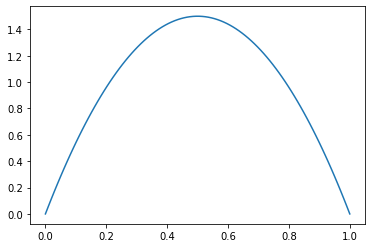

In [ ]:
fig, ax = plt.subplots(1, 1)
a, b = 2, 2 # Parameters of the distribution
Beta = scipy.stats.beta.pdf
x = np.linspace(0, 1, 100)
ax.plot(x,Beta(x,a,b))
plt.show()

For now let's work with Uniform(0,1) distribution.

So $Pr_P(p)=1_{p \in [0;1]}$. This means, that probability density is 1 whenever p is in the interval $[0;1]$, otherwise it is 0.

### Second step

How to bridge the gap between $Pr_\Lambda(\lambda|X=x)$ and $Pr_\Lambda(\lambda)$? Bayes rule comes to help us (yes, it works just fine for continous variables!):

$$Pr_\Lambda(\lambda|X=x) = \frac{Pr_X(X=x|\lambda)\times Pr_\Lambda(\lambda)}{Pr_X(x)}$$

Since $x$ has been set for us, the denominator is just some constant that normalises the probability distribution ("makes it sum to one"), so we can write that down explicitly as $\kappa$. As we will see later, we can make all the constants cancel out and we will not have to actually calculate it. The expression now becomes:

$$Pr_\Lambda(\lambda|X=x) = \kappa Pr_X(X=x|\lambda)\times Pr_\Lambda(\lambda)$$

We have seen how to calculate $Pr_X(X=x|\lambda)$ in the previous notebook! So we have everything that we need to get the posterior distribution.

In our example, we use binomial distribution for $X$, its probability mass function:

$$Pr_X(X=x|p) = {n \choose x} p^x(1-p)^{n-x}$$

Where $n=10$, $x=3$. ${n \choose x}$ is another constant that we will aggregate into $\kappa$. So we express our posterior as:

$$Pr_P(p|X=x) = \kappa p^x(1-p)^{n-x}\times Pr_P(p)$$

### Third step

Now we can start thinking about computation. 

It is important to understand that samples from the prior distribution are in a way samples of the posterior distribution - the random variable is the same. However sample "frequency" needs to be changed. Bayes step suggests how we need to further *weight* the samples to transform their distribution into the desired one. The weight we will use for each sample is:

$$w_j = \frac{\kappa Pr_X(X=x|\lambda_j)}{\Sigma^n_i\kappa Pr_X(X=x|\lambda_i)}$$

The sum at the bottom comes from the idea that the probabilities need to sum to one and is the sum of posteriors for each sample. Exact derivation involves some integration and thinking more about what we are doing. Do come up to me if you have questions about it!

We can now factor out the $\kappa$ in the denominator and simplify the expression.

$$w_j = \frac{\kappa Pr_X(X=x|\lambda_j)}{\kappa\Sigma^n_i Pr_X(X=x|\lambda_i)}= \frac{Pr_X(X=x|\lambda_j)}{\Sigma^n_i Pr_X(X=x|\lambda_i)}$$

How do we use the weights to get useful statistics? Remember previously we said that for a variable $X$ with distribution $Pr_X(x)$, we can get expected value with:
$$E[X] \approx \frac{1}{n}\Sigma^n_{i=1}x_i$$

Now for a variable $\Lambda$ conditional on $X=x$ with conditional probability $Pr_\Lambda(\lambda|X=x)$, we use the weights to account for how less or more likely a sample from $Pr_\Lambda(\lambda)$ actually should have been. The expression for expected value is:

$$E[\Lambda | X=x] = \frac{1}{n}\Sigma^n_{i=1}\lambda_iw_i$$

If you think back to the expression we got for $Pr_\Lambda(\lambda|X=x)$, that is: 

$$Pr_\Lambda(\lambda|X=x) \approx \kappa Pr_X(X=x|\lambda)\times Pr_\Lambda(\lambda)$$

You can think that $\frac{1}{n}\Sigma^n_{i=1}\lambda_i$ term in expected value expression accounts for $Pr_\Lambda(\lambda)$ and $w_i$ term accounts for $\kappa Pr_X(X=x|\lambda)$. This is not a formal argument, but I hope it can give you the right intuition!

For confidence interval we use weights in the same maner:

$$\mathbb{P}(X \leq k) \approx \Sigma^n_{i=0}1_{x_i \leq k}w_i$$

Whew! That was a lot to go through, but you will see that all this work makes our analysis very short! Lets finish up analysing the coin flip example.

Expected value: 0.33272656191380634
95% confidence interval: [ 0.07384152224618468 ; 0.5439394220332165 ]


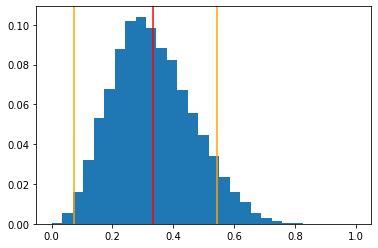

In [ ]:
# Total number of coin flips
n = 10
# Number of tails
x = 3

# Get a bunch of p samples from uniform distribution
# Note - it is very convenient to work with numpy arrays here
p_samples = np.random.uniform(size=10000)

# Calculate the weights
prx = p_samples**x * (1-p_samples)**(n-x)
w = prx/(np.sum(prx))

# Calculate the expected value
e = np.sum(w*p_samples)

print("Expected value:",e)

# Sort all weights:

i = np.argsort(w)
w = w[i]
p_samples = p_samples[i]
# Another way to find interval bounds using weights through library functions:
F = np.cumsum(w)
lo, hi = p_samples[F<0.025][-1], p_samples[F>0.0975][0]

print("95% confidence interval: [",lo,";", hi,"]")


# Plot the conditional distribution using the weights.
fig, ax = plt.subplots(1, 1)
ax.hist(p_samples, weights=w, bins=np.linspace(0,1,30))
ax.axvline(e, color="red")
ax.axvline(lo, color="orange")
ax.axvline(hi, color="orange")
plt.show()


Maybe not surprisingly, but given that 3 out of 10 tosses landed tails, we got that the expected value for $P$ is close to $\frac{3}{10}$. We would get this value using maximum likelihood estimation from before. But this time we can also observe that our confidence interval includes $0.5$. So the coin could be fair with not so small of a probability! Let's see how it changes with more experiments. 

**Exercise 3.2** Find the confidence interval for $P$ for the following result: out of 100 tosses 30 landed on tails.

**Exercise 3.3** Use the same data as in the example ($x=3$, $n=10$) to find and plot the posterior distribution for $P$. But this time use $Beta(2,2)$ as a prior.

**Exercise 3.4** A bit harder, requires more thought about $Pr_X(x|p)$! We have a coin as before which might be biased. But this time I do 4 experiments where I toss the coin 10 times. Here is how often the coin turned up tails for each: $x = [4, 1, 2, 5]$. Find a $95\%$ confidence interval for $P$ and plot the posterior distribution using histograms as in example before. Use a uniform prior distribution for $P$.

**Exercise 3.5** This exercise will require you to think how to generalise Bayesian analysis to more than one parameter (and how to choose a reasonable model for $Pr_X$ as well). I have two coins: one is fair and another.. I won't tell you! At the begining of each toss I choose the fair coin with probability $\theta$ and the other with probability $1 - \theta$ and toss the coin I have chosen. I repeat this 100 times. In the end I got 30 tails. Using uniform prior for both $\theta$ and the loadedness of the second coin, produce a confidence interval for both. Is the other coin fair?

## Frequentist analysis

Bayesian analysis viewed the parameters behind the data as distributions. Now, we will explore another way to go "meta" - frequentism. It considers a multiverse where in each world the data might have turned out a little different than what we observed. The data has some randomness in it, that is why it makes sense to imagine millions of parallel universes with their own datasets. 

The question we will ask about our data will be: if I were to teleport to another universe (or collect the data again) and calculate the number I am interested in, what is the distribution that it will follow? The number in question can be a simple mean, a maximum likelihood estimate (remember 2nd notebook) for the parameters or any other summary you find useful. Once we have samples of this number we will be able to use techniques we saw before to get the expected value and confidence intervals.

### Generating alternative datasets

There are two ways to generate a new data set given the one we see in our universe. I will call the dataset we observe $\vec{X} = (x_1, x_2, ..., x_n)$.

**Non-Parametric resampling**

The simplest way to generate a new data set is to imagine putting values of $\vec{X}$ in a box and randomly pulling out one at a time with replacement until you gather $n$ values.

Let's see how to use it in the coin example we saw before.

I toss $n=10$ coins and get $x=3$ tails. My estimate for the probability of tails is thus $\frac{x}{n} = 0.3$. I want to find a $95\%$ confidence interval using non-parametric resampling. 

This example my sound tricky at first as it seem that we do not have a vector of data. That is, would not we always draw out $x = 3$? But we can view the data in a more useful way - as a vector of coin flip results. 

$$\vec{X} = [H, T, H, H, H, T, T, H, H, H]$$

And we can take 10 samples from this dataset and calculate $x$ - the count of tails.

0.3
95% confidence interval : [ 0.0 ; 0.6 ]


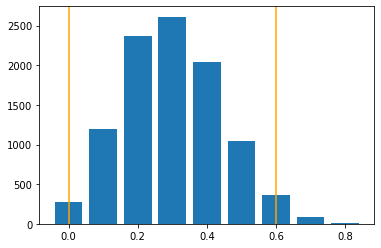

In [ ]:
X = ['H', 'T', 'H', 'H', 'H', 'T', 'T', 'H', 'H', 'H']

# Define a function to quickly get the number we want
def get_p(X):
  x = 0
  for i in X:
    if i == 'T':
      x += 1
  return x/len(X)

# Check it
print(get_p(X))

# Define a function to generate a sample
def resample(X):
  return np.random.choice(X, size=len(X), replace=True)

# Generate samples for x

p_samples = [get_p(resample(X)) for _ in range(10000)]
lo, hi = np.quantile(p_samples, [0.025, 0.975])
print("95% confidence interval : [",lo, ";", hi,"]")


# Illustrate
p, c = np.unique(np.array(p_samples), return_counts=True)
fig, ax = plt.subplots(1, 1)
ax.bar(p, c, width=0.08)
ax.axvline(lo, color="orange")
ax.axvline(hi, color="orange")
plt.show()

Compared with Bayesian analysis the distribution of parallel values is discrete. This makes sense, since from this setup our values of p can be $0, 0.1, ..., 0.9, 1$. We still get a similar result, that the coin we are tossing could be fair!

**Exercise 3.6** Repeat the analysis for another set of data: out of 100 tosses 30 land tails. To get a lot of samples for the number of tails flipped out of 100 tosses, you can use the following snippet (that is you do not need to write out one hundred element array $\vec{X}$):

In [ ]:
np.random.binomial(n = 100, p = 30/100, size = 100000)

array([30, 29, 30, ..., 29, 34, 27])

**Parametric resampling**

This way to resample data firstly fits a probability model to the data $Pr(\vec{X}|\lambda)$ and estimates the parameters. Then it uses the estimated parameters to generate a new dataset of the same length. 

In exercise **3.6** you were getting into prametric resampling teritory as $p=\frac{30}{100}$ is a maximum likelihood estimate. Actually, with parametric resampling you would get the same results for the coin example as with non-parametric one. So let's use another example. 

Let's use the email example we saw in the second notebook. As a reminder, here is a data set of the number of emails I got per day:

In [ ]:
X = [5, 6, 10, 2, 7, 3, 1, 1, 2, 1]

This time a summary statistics we will explore is the mean number of emails per day:

In [ ]:
# The maximum likelihood estimator for lambda we got previously (rounded)
l = 3.7998

# Generate a new sample using lambda
def resample(l, X):
  return np.random.poisson(lam = l, size = len(X))

mean_samples = [np.mean(resample(l, X)) for _ in range(10000)]

lo, hi = np.quantile(mean_samples, [0.025, 0.975])
print("95% confidence interval : [",lo, ";", hi,"]")

95% confidence interval : [ 2.6 ; 5.1 ]


That is basically all there is to frequentist analysis! It is quite a painless way to generate inferences from datasets. Use it when you know little about the the prior distribution or doubts about what model to fit. It provides a great first step to uncover some interesting trends and drive your investigation further. 

**Exercise 3.7** Measuring difference.

You have two a little bit different versions of your killer app. You show version A to $n=6$ people and measure how much time they spent to do a particular action. Here are the results: $\vec{X} = [7.2, 7.3, 7.8, 8.2, 8.8, 9.5]$. You show version B to $m=3$ people and repeat the measurements to get $\vec{Y} = [8.3, 8.5, 9.2]$. You assume that both of these measurements come from Normal distributions with the same variation but different means. I.e. $X \sim Normal(m_x, s^2)$ and $Y \sim Normal(m_y, s^2)$. You care about the question is system A significantly better than system B? To answer that you will need to find a $95\%$ confidence interval for difference of means $d = m_y - m_x$. If the interval includes 0, then the means are not significantly different!

a) Use non-parametric resampling to answer this question.

1.   Write a function that generates a sample for $\vec{X}$ and $\vec{Y}$.
2.   Write a function that calculates $d$ based on the two samples.
3.   Find confidence interval for $d$

b) Use parametric resampling to find confidence interval.

1.  The maximum likelihood estimate for $m_x$ and $m_y$ is the mean of the respective dataset, the maximum likelihood estimate for variation is:
$$s^2 = \frac{1}{n+m}(\Sigma^n_{i=1}(x_i-m_x) ^2 + \Sigma^m_{i=1}(y_i-m_y)^2) $$
2. Write a function that generates samples using these maximum likelihood estimates. Use `np.random.normal`. 
2.   Write a function that calculates $d$ based on the two samples.
3.   Find confidence interval for $d$


